# Imports

In [13]:
import whisper
import nltk
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\netinhoklz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\netinhoklz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\netinhoklz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Carregando modelo

In [14]:
model = whisper.load_model("base")

# Transcrevendo áudio

In [15]:
audio_file_path = "audio_formatado.mp3"
result = model.transcribe(audio_file_path)

print("Texto transcrito:")
print(result["text"])

Texto transcrito:
 gravando aqui o livro para desenvolver um modelo multi-class que classificam o livro agora uma faca e também classificar um celular


# Tratando o texto

## Tokenizando

In [17]:
tokens = word_tokenize(result["text"].lower())

## Lematização

In [18]:
stop_words = set(stopwords.words('portuguese'))
lemmatizer = WordNetLemmatizer()
palavras_processadas = []
for token in tokens:
    if token.isalpha() and token not in stop_words:
        palavra_lematizada = lemmatizer.lemmatize(token)
        palavras_processadas.append(palavra_lematizada)

# Contagem de Palavras

In [19]:
df = pd.DataFrame(palavras_processadas, columns=['palavras'])

# Conta a frequência de cada palavra.
frequencia_palavras = df['palavras'].value_counts()

# Pega as 10 palavras mais frequentes para o gráfico.
top_palavras = frequencia_palavras.head(10)

print("As 10 palavras mais frequentes:")
print(top_palavras)

As 10 palavras mais frequentes:
palavras
livro          2
gravando       1
aqui           1
desenvolver    1
modelo         1
classificam    1
agora          1
faca           1
classificar    1
celular        1
Name: count, dtype: int64


# Plot principais palavras

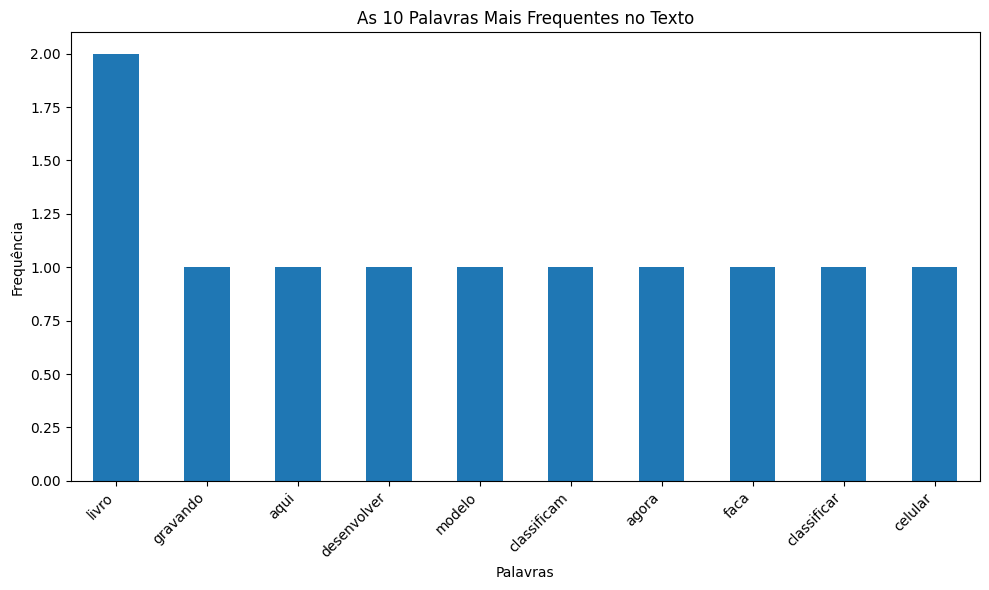

In [20]:
plt.figure(figsize=(10, 6))
top_palavras.plot(kind='bar')
plt.title('As 10 Palavras Mais Frequentes no Texto')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()